<a href="https://colab.research.google.com/github/dmt171004/ML-DL/blob/main/B%C3%A0i_th%E1%BB%B1c_h%C3%A0nhTMG301_NaiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Sample movie review data
positive_reviews = [
    "I loved the movie! The acting was great.",
    "The plot was engaging and the characters were well-developed.",
    "The visuals were amazing. Highly recommended.",
    "The movie exceeded my expectations. A must-watch!"
]

negative_reviews = [
    "The movie was a complete disappointment.",
    "I couldn't stand the acting and the plot was confusing.",
    "The film lacked depth and failed to impress.",
    "It was a waste of time and money."
]

test_reviews = [
    "The movie was fantastic! The storyline was captivating.",
    "I didn't enjoy the film. The acting was mediocre.",
    "Overall, the movie was decent, but not exceptional.",
    "The plot had potential, but execution fell short."
]

# Task 1: Data Preprocessing
def preprocess_text(text):
    return text.lower()

# Task 2: Build Naive Bayes Classifier
def build_naive_bayes_classifier(positive_data, negative_data):
    # Combine positive and negative data for a single vocabulary
    all_data = positive_data + negative_data

    vectorizer = CountVectorizer(preprocessor=preprocess_text)
    print()
    X = vectorizer.fit_transform(all_data) # Fit and transform on all data

    y_positive = ['positive'] * len(positive_data)
    y_negative = ['negative'] * len(negative_data)
    y = y_positive + y_negative

    classifier = MultinomialNB()
    classifier.fit(X, y)

    # Store the vectorizer as an attribute of the classifier
    classifier.vectorizer = vectorizer # Add this line to store vectorizer

    return classifier

In [8]:
# Task 3: Predict Sentiments
def predict_sentiments(classifier, test_data):
    test_data_preprocessed = [preprocess_text(review) for review in test_data]
    X_test = classifier.vectorizer.transform(test_data_preprocessed)
    # Access the classifier attribute within the SentimentClassifier object
    predictions = classifier.classifier.predict(X_test)
    return predictions

# Task 4: Evaluate the Classifier
def evaluate_classifier(predictions, true_labels):
    accuracy = accuracy_score(true_labels, predictions)
    return accuracy

# Class to store the trained classifier and vectorizer
class SentimentClassifier:
    def __init__(self, classifier, vectorizer):
        self.classifier = classifier
        self.vectorizer = vectorizer

# Task 5: Test Your Functions
if __name__ == "__main__":
    positive_data = positive_reviews
    negative_data = negative_reviews
    classifier = build_naive_bayes_classifier(positive_data, negative_data)
    sentiment_classifier = SentimentClassifier(classifier, classifier.vectorizer)

    test_labels = ['positive', 'negative', 'positive', 'negative']
    predictions = predict_sentiments(sentiment_classifier, test_reviews)

    accuracy = evaluate_classifier(predictions, test_labels)

    print("Accuracy:", accuracy)
    print("Predictions:", predictions)


Accuracy: 0.75
Predictions: ['positive' 'negative' 'positive' 'positive']


In [9]:
from sklearn.feature_extraction.text import CountVectorizer

# Sample text data
documents = [
    "I love machine learning",
    "Machine learning is amazing",
    "I love coding in Python"
]

# Initialize CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the text data
X = vectorizer.fit_transform(documents)

# Feature names (vocabulary)
print("Vocabulary:\n", vectorizer.get_feature_names_out())

# Sparse matrix representation of word counts
print("\nSparse Matrix:\n", X)

# Convert to dense matrix for better readability
print("\nDense Matrix:\n", X.toarray())

Vocabulary:
 ['amazing' 'coding' 'in' 'is' 'learning' 'love' 'machine' 'python']

Sparse Matrix:
   (0, 5)	1
  (0, 6)	1
  (0, 4)	1
  (1, 6)	1
  (1, 4)	1
  (1, 3)	1
  (1, 0)	1
  (2, 5)	1
  (2, 1)	1
  (2, 2)	1
  (2, 7)	1

Dense Matrix:
 [[0 0 0 0 1 1 1 0]
 [1 0 0 1 1 0 1 0]
 [0 1 1 0 0 1 0 1]]


In [5]:
#######################3
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px


from wordcloud import WordCloud
import nltk
import re
import string
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


stop_words = stopwords.words()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


<font color='blue'>**Load dataset using pandas**:</font>



In [12]:
# Your code here
data = pd.read_csv('dataset.csv')
columns = ['review', 'sentiment']
data[columns].head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


### <font color='blue'>EDA



In [15]:
# Your code here
data['sentiment'].value_counts()

,count
sentiment,
positive,25000
negative,25000


### <font color='blue'>**Keep 1000 positive comments and 1000 negative comments**:</font>


In [17]:
# Your code here
new_data = data.groupby('sentiment').apply(lambda x: x.sample(n=1000, random_state=42)).reset_index(drop=True)
new_data['sentiment'].value_counts()

<ipython-input-17-999cd4e76781>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  new_data = data.groupby('sentiment').apply(lambda x: x.sample(n=1000, random_state=42)).reset_index(drop=True)


,count
sentiment,
negative,1000
positive,1000


### <font color='blue'>**Draw a digram to visualize the lenght of total review/comments**:</font>


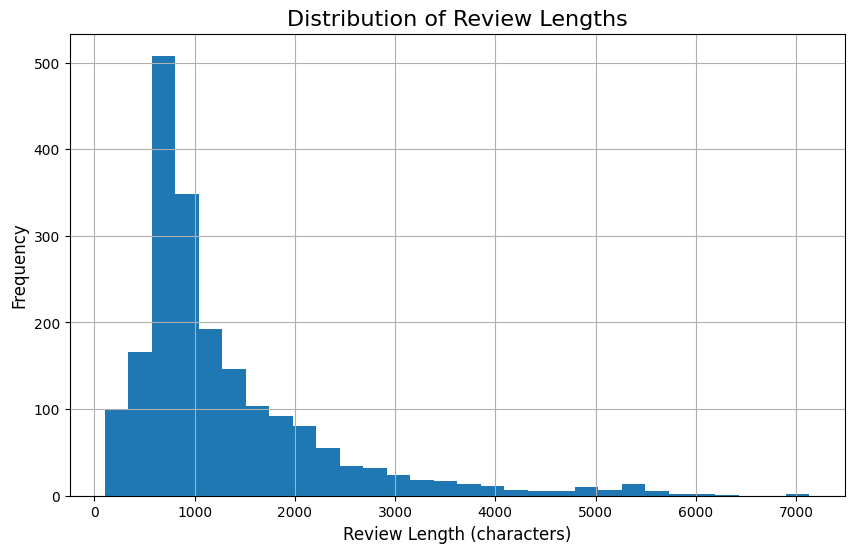

In [31]:
df = pd.DataFrame(new_data)
df['review_length'] = df['review'].apply(len)
# Plot the histogram of review lengths
plt.figure(figsize=(10, 6))
plt.hist(df['review_length'], bins=30)
plt.title('Distribution of Review Lengths', fontsize=16)
plt.xlabel('Review Length (characters)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid()

### <font color='blue'>**Draw a digram to visualize the lenght of negative or positive review/comments**:</font>


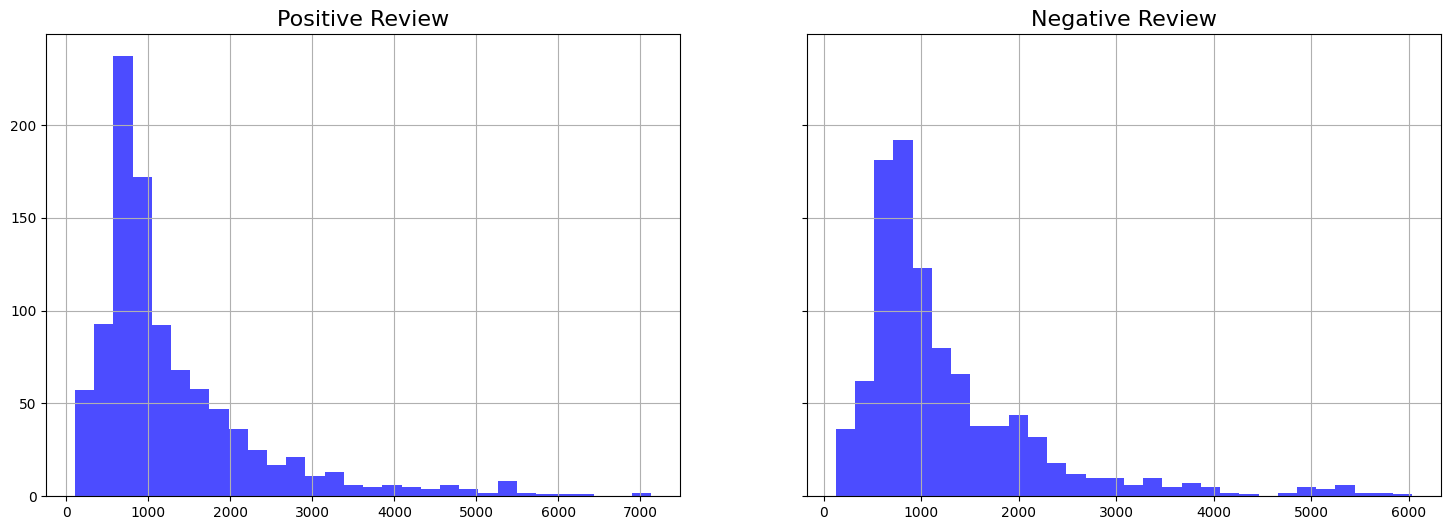

In [32]:

# Calculate the length of each review
df['review_length'] = df['review'].apply(len)
# Separate positive and negative reviews
positive_reviews = df[df['sentiment'] == 'positive']
negative_reviews = df[df['sentiment'] == 'negative']
# Plot the histogram of positive review lengths
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6), sharey=True)
ax1.hist(positive_reviews['review_length'], bins=30, color='blue', alpha=0.7)
ax1.set_title('Positive Review', fontsize=16)
ax1.grid()
# Plot the histogram of negative review lengths
ax2.hist(negative_reviews['review_length'], bins=30, color='blue', alpha=0.7)
ax2.set_title('Negative Review', fontsize=16)
ax2.grid()

plt.show()

### <font color='blue'>** Sử dụng WordCloud để tạo hình ảnh năm bắt các bình luận positive mà khach khách quan tâm nhất**:</font>


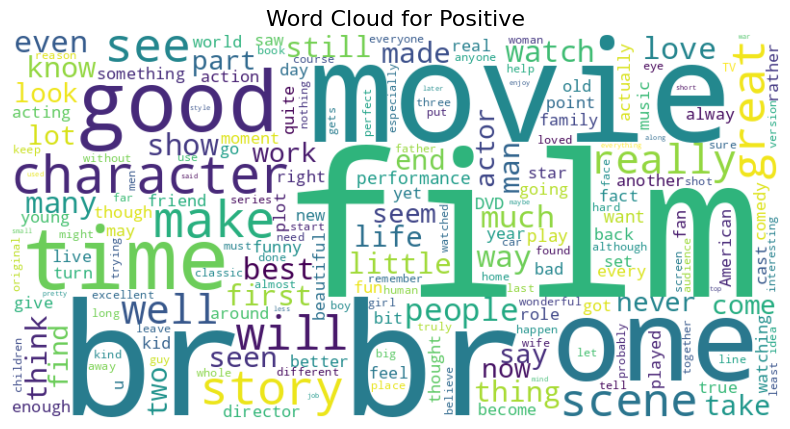

In [34]:
# Your code here
positive_reviews = df[df['sentiment'] == 'positive']
# Combine all positive reviews into a single string
positive_text = " ".join(review for review in positive_reviews['review'])
# Generate the word cloud for positive reviews
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive', fontsize=16)
plt.show()


### <font color='blue'>** Sử dụng WordCloud để tạo hình ảnh năm bắt các bình luận negative mà khach khách quan tâm nhất**:</font>


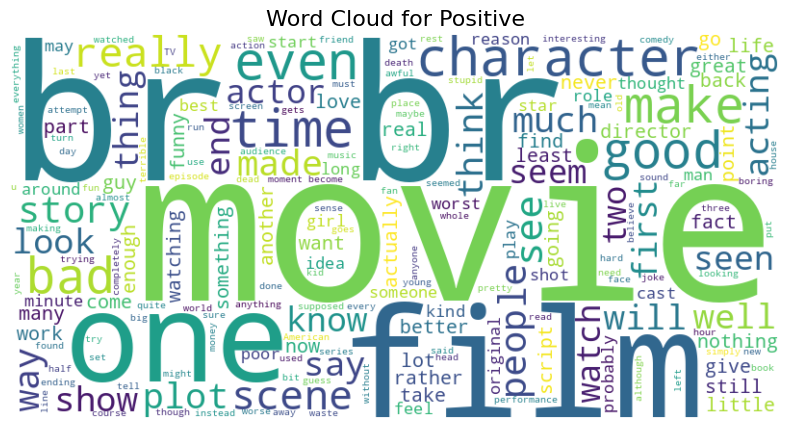

In [35]:
# Your code here
positive_reviews = df[df['sentiment'] == 'negative']
# Combine all negative reviews into a single string
positive_text = " ".join(review for review in positive_reviews['review'])
# Generate the word cloud for negative reviews
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive', fontsize=16)
plt.show()

### <font color='blue'>** Đổi tên cột review thành text**:</font>


In [36]:
df.rename(columns={'review':'text'}, inplace = True)
df

,text,sentiment,review_length
0,I was looking forward to seeing Bruce Willis i...,negative,1563
1,Bugs Bunny accidentally ends up at the South P...,negative,643
2,I find it difficult to comprehend what makes v...,negative,710
3,It's been said several times - not least by me...,negative,1107
4,New rule. Nobody is allowed to make any more Z...,negative,1182
...,...,...,...
1995,This movie is about development. People growin...,positive,602
1996,Errol Flynn's roguish charm really shines thro...,positive,1021
1997,From the very beginning I was so excited to se...,positive,1720
1998,"""Prime Suspect 4"" continues the exploits of th...",positive,1109


### <font color='blue'>** chuyển chữ thường, loại bỏ các bình luận có url, ký tự đặc biệt, remove short form như:**:
    
    text=re.sub("isn't",'is not',text)
    text=re.sub("he's",'he is',text)
    text=re.sub("wasn't",'was not',text)
    text=re.sub("there's",'there is',text)
    text=re.sub("couldn't",'could not',text)
    text=re.sub("won't",'will not',text)
</font>


In [38]:
# Your code here
def clean_text(text):
    text = text.lower()
    # Convert to lowercase
    text = re.sub(r'http\S+', '', text)
    # Remove URLs
    text = re.sub(r'[^a-z\s]', '', text)
    # Remove special characters
    text = re.sub(r"\bisn't\b", 'is not', text)
    text = re.sub(r"\bhe's\b", 'he is', text)
    text = re.sub(r"\bwasn't\b", 'was not', text)
    text = re.sub(r"\bthere's\b", 'there is', text)
    text = re.sub(r"\bcouldn't\b", 'could not', text)
    text = re.sub(r"\bwon't\b", 'will not', text)
    return text
# Apply the clean_text function to the reviews
df['cleaned_review'] = df['text'].apply(clean_text)
# Filter positive reviews
positive_reviews = df[df['sentiment'] == 'positive']
# Combine all positive reviews into a single string
positive_text = " ".join(review for review in positive_reviews['cleaned_review'])
# Generate the word cloud for positive reviews
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)



In [41]:
dt = pd.DataFrame(df)
dt['sentiment']=df['sentiment']
dx = dt[['text','sentiment']]

,text,sentiment
0,I was looking forward to seeing Bruce Willis i...,negative
1,Bugs Bunny accidentally ends up at the South P...,negative
2,I find it difficult to comprehend what makes v...,negative
3,It's been said several times - not least by me...,negative
4,New rule. Nobody is allowed to make any more Z...,negative
...,...,...
1995,This movie is about development. People growin...,positive
1996,Errol Flynn's roguish charm really shines thro...,positive
1997,From the very beginning I was so excited to se...,positive
1998,"""Prime Suspect 4"" continues the exploits of th...",positive


### <font color='blue'>** remove stop word trong dữ liệu comments`**:</font>


In [50]:
# remove stop word, tạo thêm cột no_sw để lưu trữ kết quả
# Your code here
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = stopwords.words('english')  # Assuming English stopwords

dt['no_sw'] = dt['cleaned_review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
dt = dt.drop(columns=['cleaned_review'])


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


KeyError: 'cleaned_review'

In [52]:
dt = dt.drop(columns=['review_length'])

In [53]:
dt

,text,sentiment,no_sw
0,I was looking forward to seeing Bruce Willis i...,negative,looking forward seeing bruce willis especially...
1,Bugs Bunny accidentally ends up at the South P...,negative,bugs bunny accidentally ends south pole trying...
2,I find it difficult to comprehend what makes v...,negative,find difficult comprehend makes viewers feel p...
3,It's been said several times - not least by me...,negative,said several times least watching eric rohmer ...
4,New rule. Nobody is allowed to make any more Z...,negative,new rule nobody allowed make zombie movies unl...
...,...,...,...
1995,This movie is about development. People growin...,positive,movie development people growing people fading...
1996,Errol Flynn's roguish charm really shines thro...,positive,errol flynns roguish charm really shines enter...
1997,From the very beginning I was so excited to se...,positive,beginning excited see movie poster possibly fu...
1998,"""Prime Suspect 4"" continues the exploits of th...",positive,prime suspect continues exploits inscrutable d...


### <font color='blue'>** Loại bỏ các từ xuất hiện với tần suất nhiều nhất: gọi ý chon 10 từ có tần suất xuất hiện nhiều nhất**:</font>


In [54]:
#Working with the most Frequent Words:
from collections import Counter
cnt = Counter()
for text in dt["no_sw"].values:
    for word in text.split():
        cnt[word] += 1
cnt.most_common(10)
temp = pd.DataFrame(cnt.most_common(10))
temp.columns=['word', 'count']
temp

,word,count
0,br,4404
1,movie,3306
2,film,3049
3,one,2092
4,like,1576
5,good,1093
6,would,1004
7,even,995
8,time,990
9,really,874


In [55]:
px.bar(temp, x="count", y="word", title='Commmon Words in Text', orientation='h',
             width=700, height=700)

In [58]:
# Remove the most frequent words, tạo them cột wo_stop_freq đê lưu kết quả
# Your code here
cnt = Counter()
for text in dt["no_sw"].values:
    for word in text.split():
        cnt[word] += 1

# Get the 10 most common words
most_common_words = [word for word, count in cnt.most_common(10)]

# Remove the most frequent words and create the new column
dt['wo_stopfreq'] = dt['no_sw'].apply(lambda x: ' '.join([word for word in x.split() if word not in most_common_words]))
dt

,text,sentiment,no_sw,wo_stopfreq
0,I was looking forward to seeing Bruce Willis i...,negative,looking forward seeing bruce willis especially...,looking forward seeing bruce willis especially...
1,Bugs Bunny accidentally ends up at the South P...,negative,bugs bunny accidentally ends south pole trying...,bugs bunny accidentally ends south pole trying...
2,I find it difficult to comprehend what makes v...,negative,find difficult comprehend makes viewers feel p...,find difficult comprehend makes viewers feel p...
3,It's been said several times - not least by me...,negative,said several times least watching eric rohmer ...,said several times least watching eric rohmer ...
4,New rule. Nobody is allowed to make any more Z...,negative,new rule nobody allowed make zombie movies unl...,new rule nobody allowed make zombie movies unl...
...,...,...,...,...
1995,This movie is about development. People growin...,positive,movie development people growing people fading...,development people growing people fading peopl...
1996,Errol Flynn's roguish charm really shines thro...,positive,errol flynns roguish charm really shines enter...,errol flynns roguish charm shines entertaining...
1997,From the very beginning I was so excited to se...,positive,beginning excited see movie poster possibly fu...,beginning excited see poster possibly funniest...
1998,"""Prime Suspect 4"" continues the exploits of th...",positive,prime suspect continues exploits inscrutable d...,prime suspect continues exploits inscrutable d...


In [59]:
dt['no_sw'].loc[5]

'ambiguity michael myers withered away thanks series chronic habit arseholing continuity pulling relatives nowhere entry introduces potty angle hes psycho killer actually controlled runes appear star constellation every halloween cult using erm well film far coherent lost track plot movie hemorrhages credibility profusely doesnt drop left end michael put one victims clothes washing machine otherwise empty corridor deadly spike sticking wall getting electrocuted really make head explode left donald pleasence penultimate film role produce wonderful little moments pile dreadful dialogue hes given'

In [60]:
dt['wo_stopfreq'].loc[5]

'ambiguity michael myers withered away thanks series chronic habit arseholing continuity pulling relatives nowhere entry introduces potty angle hes psycho killer actually controlled runes appear star constellation every halloween cult using erm well far coherent lost track plot hemorrhages credibility profusely doesnt drop left end michael put victims clothes washing machine otherwise empty corridor deadly spike sticking wall getting electrocuted make head explode left donald pleasence penultimate role produce wonderful little moments pile dreadful dialogue hes given'

### <font color='blue'>** Sử dụng WordNetLemmatizer để đưa từ về baseform**:</font>


In [61]:
# Lemmatization: Lemmatization is converting the word to its base form or lemma by removing affixes from the inflected words.
# It helps to create better features for machine learning and NLP models hence it is an important preprocessing step.
# tạo thêm cột wo_stopfreq_lem để lưu kết quả

# Your code here
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

dt['wo_stopfreq_lem'] = dt['wo_stopfreq'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

dt

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


,text,sentiment,no_sw,wo_stopfreq,wo_stopfreq_lem
0,I was looking forward to seeing Bruce Willis i...,negative,looking forward seeing bruce willis especially...,looking forward seeing bruce willis especially...,looking forward seeing bruce willis especially...
1,Bugs Bunny accidentally ends up at the South P...,negative,bugs bunny accidentally ends south pole trying...,bugs bunny accidentally ends south pole trying...,bug bunny accidentally end south pole trying v...
2,I find it difficult to comprehend what makes v...,negative,find difficult comprehend makes viewers feel p...,find difficult comprehend makes viewers feel p...,find difficult comprehend make viewer feel pow...
3,It's been said several times - not least by me...,negative,said several times least watching eric rohmer ...,said several times least watching eric rohmer ...,said several time least watching eric rohmer w...
4,New rule. Nobody is allowed to make any more Z...,negative,new rule nobody allowed make zombie movies unl...,new rule nobody allowed make zombie movies unl...,new rule nobody allowed make zombie movie unle...
...,...,...,...,...,...
1995,This movie is about development. People growin...,positive,movie development people growing people fading...,development people growing people fading peopl...,development people growing people fading peopl...
1996,Errol Flynn's roguish charm really shines thro...,positive,errol flynns roguish charm really shines enter...,errol flynns roguish charm shines entertaining...,errol flynns roguish charm shine entertaining ...
1997,From the very beginning I was so excited to se...,positive,beginning excited see movie poster possibly fu...,beginning excited see poster possibly funniest...,beginning excited see poster possibly funniest...
1998,"""Prime Suspect 4"" continues the exploits of th...",positive,prime suspect continues exploits inscrutable d...,prime suspect continues exploits inscrutable d...,prime suspect continues exploit inscrutable do...


### <font color='blue'>** giữ lại column sentiment và wo_stopfreq_lem, đổi tên cột wo_stopfreq_lem thành review**:</font>


In [64]:
# tạo dataframe mới "nb" để lưu trữ thông tin cột sentiment và cột review. Trong đó cột review được lấy từ cột wo_stopfreq
# create the cleaned data for the train-test split:
# Your code here
nb = dt[['sentiment', 'wo_stopfreq_lem']].copy()  # Create a copy to avoid SettingWithCopyWarning
nb.rename(columns={'wo_stopfreq_lem': 'review'}, inplace=True)
nb['sentiment'] = nb['sentiment'].map({'positive': 1, 'negative': 0})

nb

,sentiment,review
0,0,looking forward seeing bruce willis especially...
1,0,bug bunny accidentally end south pole trying v...
2,0,find difficult comprehend make viewer feel pow...
3,0,said several time least watching eric rohmer w...
4,0,new rule nobody allowed make zombie movie unle...
...,...,...
1995,1,development people growing people fading peopl...
1996,1,errol flynns roguish charm shine entertaining ...
1997,1,beginning excited see poster possibly funniest...
1998,1,prime suspect continues exploit inscrutable do...


### <font color='blue'>** tách bình luận thành tokens**:</font>


In [65]:

tokenized_review=nb['review'].apply(lambda x: x.split())
tokenized_review.head(5)

,review
0,"[looking, forward, seeing, bruce, willis, espe..."
1,"[bug, bunny, accidentally, end, south, pole, t..."
2,"[find, difficult, comprehend, make, viewer, fe..."
3,"[said, several, time, least, watching, eric, r..."
4,"[new, rule, nobody, allowed, make, zombie, mov..."


### <font color='blue'>** sử dụng CountVectorizer để convert text to numerical**:</font>


In [66]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
# Your code here
cv = CountVectorizer()

text_counts = cv.fit_transform(nb['review'])

### <font color='blue'>** chuẩn bị dữ liệu trên huấn luyện Naive bayes**:</font>


In [67]:
from sklearn.model_selection import train_test_split
X=text_counts
y=nb['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=30)

### <font color='blue'>** Sử dụng MultinomialNB để huấn luyện và đánh giá độ chính xác**:</font>


In [70]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

MNB = MultinomialNB()
MNB.fit(X_train, y_train)

predicted = MNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, y_test)

print('MultinominalNB model accuracy is',str('{:04.2f}'.format(accuracy_score*100))+'%')
print('------------------------------------------------')
print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(y_test, predicted)))
print('------------------------------------------------')
print('Classification Report:')
print(classification_report(y_test, predicted))

MultinominalNB model accuracy is 81.50%
------------------------------------------------
Confusion Matrix:
     0    1
0  158   20
1   54  168
------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.89      0.81       178
           1       0.89      0.76      0.82       222

    accuracy                           0.81       400
   macro avg       0.82      0.82      0.81       400
weighted avg       0.83      0.81      0.82       400

